In [41]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler




In [42]:
ckd=pd.read_csv("final.csv")
y = ckd['Class']
# no feature seleection
#new_ckd = ckd.drop(['Class'], axis=1)
#correlation 
#new_ckd = ckd.drop(['Class','Age','Bp', 'Sg', 'Su','Rbc','Pcc','Ba','Sod','Pot','Wbcc','Pcv','Rbcc','Htn','Dm','Cad','Appet','pe','Ane'], axis=1)
#lasso 
#new_ckd = ckd.drop(['Class','Age', 'Bp', 'Bgr', 'Sc', 'Sod', 'Bu', 'Pot', 'Wbcc', 'Rbcc','Htn','Dm','Appet','pe', 'Cad','Ane','Sg','Hemo','Pcv'], axis=1) 
#wrapper
new_ckd = ckd.drop(['Class','Age', 'Bp', 'Su','Sg','Rbc', 'Pc', 'Pcc', 'Ba', 'Bgr', 'Bu', 'Sc', 'Sod', 'Pot',  'Pcv', 'Wbcc', 'Rbcc', 'Appet', 'Ane'], axis=1)


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_ckd, y , test_size=0.5, random_state=0)

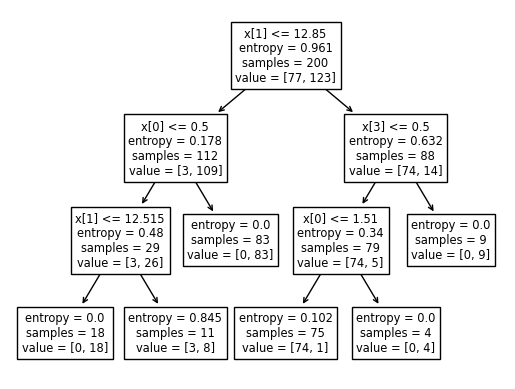

Accuracy on training set: 0.980
Accuracy on test set: 0.955


In [44]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, max_leaf_nodes=7) 
model.fit(x_train,y_train)


#Plotting the decision tree

tree.plot_tree(model) # This will produce the default version of decision tree
plt.show()




# Predicting on test data
preds = model.predict(x_test) # predicting on test data set 


# Result Evaluation
"""print("Classicfication report:\n",classification_report(y_test,preds))

print("Confusion Matrix:\n",confusion_matrix(y_test,preds))

print("\nAccuracy:",accuracy_score(y_test,preds))"""

print("Accuracy on training set: {:.3f}".format(model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(x_test, y_test)))

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
newpred=preds.round()
newpred=abs(newpred)
precision=precision_score(y_test,newpred)
recall=recall_score(y_test,newpred)
f1=f1_score(y_test,newpred)
accuracy=accuracy_score(y_test,newpred)
auc=roc_auc_score(y_test,preds)
gini=2*auc-1
print("gini",gini)
print("Precision",precision*100)
print("Recall",recall*100)
print("f1 score",f1*100)
print("roc auc score",auc*100)
print("accuracy",accuracy*100)

gini 91.16600151008525
Precision 97.58064516129032
Recall 95.2755905511811
f1 score 96.41434262948209
roc auc score 95.58300075504262
accuracy 95.5
